# Bildtransformation

### Bild aus Internet-Repository importieren

Wir laden das Bild einer Espressotasse aus dem Internet.

In [2]:
from data import load_image, espresso, leuchtturm

FileNotFoundError: [Errno 2] No such file or directory: './daten/coffee.jpg'

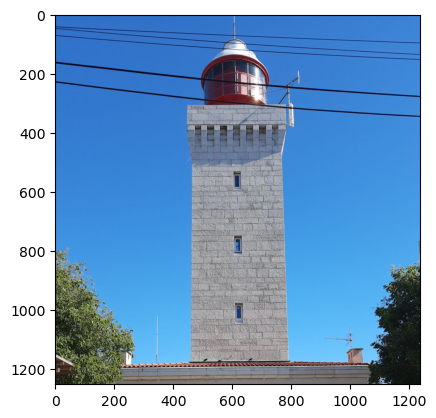

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

image = leuchtturm

plt.imshow(image)
plt.show();

## PT05 - Bildtransformation

Die Bilddaten werden skaliert und in einen PyTorch-Tensor transformiert. Mit `unsqueeze` wird aus dem einzelnen Datensatz ein Batch:

In [3]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
     mean = [0.485,0.465,0.406],
        std = [0.229,0.224,0.225]
    )
])

img_tensor = transform(image)

batch = img_tensor.unsqueeze(0)

### Laden der Labels zu den Klassen der Bilder

In [4]:
from data import load_imagenet_class_labels 

classes = load_imagenet_class_labels()

### AlexNet Modell laden

Das Modell von __AlexNet__ ist ein an Millionen von Fotos trainiertes Neuronales Netz. 

https://en.wikipedia.org/wiki/AlexNet

Wir laden die Gewichte:

In [5]:
import torch
from torchvision import models
from torchvision.models import AlexNet_Weights

model = models.alexnet(weights=AlexNet_Weights.DEFAULT)

### Evaluation des Bildes mit AlexNet

In [6]:
from tools import device

device = device()

model.eval()
model.to(device)
y = model(batch.to(device))

### Anzeige des Ergebnisses

In [7]:
y_max , index = torch.max(y,1)
idx = index[0]
prob = torch.nn.functional.softmax(y, dim=1)[0]
print(f'Gefundene Klasse: {index} -> {classes[index.item()]} ({prob[idx].item():.2%}) \ny_max: {y_max}')

Gefundene Klasse: tensor([437], device='cuda:0') -> 437: 'beacon, lighthouse, beacon light, pharos', (83.97%) 
y_max: tensor([16.0186], device='cuda:0', grad_fn=<MaxBackward0>)


In [8]:
_, indices = torch.sort(y, descending = True)

for idx in indices[0][:5]:
    print(f'{classes[idx]} - \t {prob[idx].item():.2%}')

437: 'beacon, lighthouse, beacon light, pharos', - 	 83.97%
442: 'bell cote, bell cot', - 	 10.17%
900: 'water tower', - 	 2.23%
733: 'pole', - 	 0.71%
708: 'pedestal, plinth, footstall', - 	 0.66%
